### Using Protodash to get protorypes of respondants.

In [ ]:
pip install aix360

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from aix360.algorithms.protodash import ProtodashExplainer, get_Gaussian_Data


In [9]:
df=pd.read_csv("dataproject2022.csv", sep=';', index_col="ID",  decimal=',')
df= df.drop(['Pred_default (y_hat)', 'PD','Group'] , axis = 1)
df

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y)
ID,,,,,,,,,,,
1,34,55,4875,3087,0,36,0.0479,0,1,1,0
2,5,29,13000,13000,0,60,0.0917,0,0,0,1
3,14,38,17190,14190,0,60,0.0882,0,0,0,0
4,16,37,22773,23568,0,48,0.1101,0,1,1,0
5,1,61,7700,8526,0,48,0.1234,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7436,1,24,17990,17990,0,72,0.1260,0,0,1,0
7437,2,43,23000,24418,0,72,0.1655,0,1,0,0
7438,1,22,16990,18283,0,60,0.0868,0,0,0,1


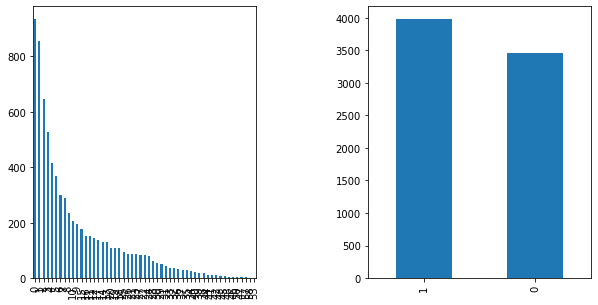

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(wspace=0.5)
hist1 = df['Job tenure'].value_counts().plot(kind='bar', ax=axes[0])
hist2 = df['Married'].value_counts().plot(kind='bar', ax=axes[1])
plt.show()

In [10]:
data = df.to_numpy()

#sort the rows by sequence numbers in 1st column 
idx = np.argsort(data[:, 0])  
data = data[idx, :]

# replace nan's (missing values) with 0's
original = data
original[np.isnan(original)] = 0

# delete 1st column (sequence numbers)
original = original[:, 1:]

# one hot encode all features as they are categorical

explainer = ProtodashExplainer()

# call protodash explainer
# S contains indices of the selected prototypes
# W contains importance weights associated with the selected prototypes 
(W, S, _) = explainer.explain(original, original, m=10) 


/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in in

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -2.0000e+04  4e+00  1e+00  1e+00
 1: -1.2166e+08 -1.8046e+12  2e+12  1e-01  1e-01
 2: -1.3770e+08 -1.8047e+12  2e+12  1e-01  1e-01
 3: -1.3188e+08 -1.8047e+12  2e+12  1e-01  1e-01
 4: -1.2642e+08 -1.7781e+12  2e+12  1e-01  1e-01
 5: -1.4780e+08 -2.0213e+10  2e+10  2e-16  1e-15
 6: -1.4934e+08 -3.5039e+08  2e+08  5e-16  7e-17
 7: -1.4934e+08 -1.5148e+08  2e+06  3e-16  4e-17
 8: -1.4934e+08 -1.4936e+08  2e+04  9e-17  1e-16
 9: -1.4934e+08 -1.4934e+08  2e+02  2e-16  2e-17
10: -1.4934e+08 -1.4934e+08  3e+00  4e-16  7e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -3.0000e+04  6e+00  1e+00  1e+00
 1: -1.5547e+03 -2.5949e+07  3e+03  1e+00  1e+00
 2: -1.8581e+03 -5.7219e+07  8e+03  1e+00  1e+00
 3:  2.8247e+05 -1.4931e+10  2e+06  1e+00  1e+00
 4:  4.1440e+05 -1.9774e+10  2e+06  1e+00  1e+00
 5:  1.4943e+06 -8.0782e+10  1e+07  1e+00  1e+00
 6:  3.5228e+07 -1.6594e+12  2e+08  1e+00  1e+0

In [11]:
inc_prototypes = df.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Weights of Prototypes
ID,,,,,,,,,,,,
2327,19,53,3134,3366,0,36,0.0430,0,1,1,0,0.22
5001,18,48,27960,28410,0,60,0.1271,1,1,1,1,0.02
5788,23,40,20900,19200,0,60,0.0565,0,1,1,0,0.01
5512,1,57,17990,19272,0,60,0.1500,0,0,0,1,0.21
6494,14,46,11859,6006,0,72,0.0247,0,1,1,1,0.08
1793,11,51,14500,11368,0,48,0.1280,0,1,0,0,0.01
4775,0,49,12990,10076,0,96,0.0590,0,0,0,0,0.05
346,0,32,14460,10762,0,60,0.0883,0,0,0,0,0.16
5064,24,49,11090,11090,0,60,0.0791,0,1,1,1,0.22
